# 1. 数据

## 1.1导入库函数

In [5]:
import numpy as np # 线性代数相关的库
import pandas as pd # 数据处理的库，用于读取csv文件
import matplotlib.pyplot as plt # 数据可视化
import seaborn as sns # 统计数据可视化

## 1.2 导入数据集

In [6]:
# data = 'path/to/your/data'
data = 'weatherAUS.csv'

df = pd.read_csv(data)

## 1.3 数据探索性分析(EDA)

### 1.3.1 数据的总体分析

In [7]:
# 查看数据集的维度

df.shape

(145460, 23)

In [8]:
# 观察数据集的前五行数据

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
# 查看各列的名字叫什么
col_names = df.columns

col_names 

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
# 查看数据集的总结

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null


| 列名            | 描述                                                    |
|----------------|---------------------------------------------------------|
| Date           | 观察日期                                                |
| Location       | 获取该信息的气象站的名称                                |
| MinTemp        | 以摄氏度为单位的低温度                                  |
| MaxTemp        | 以摄氏度为单位的高温度                                  |
| Rainfall       | 当天记录的降雨量，单位为mm                               |
| Evaporation    | 到早上9点之前的24小时的A级蒸发量(mm)                   |
| Sunshine       | 白日受到日照的完整小时                                  |
| WindGustDir    | 在到午夜12点前的24小时中的强风的风向                    |
| WindGustSpeed  | 在到午夜12点前的24小时中的强风速(km/h)                  |
| WindDir9am     | 上午9点时的风向                                          |
| WindDir3pm     | 下午3点时的风向                                          |
| WindSpeed9am   | 上午9点之前每个十分钟的风速的平均值(km/h)              |
| WindSpeed3pm   | 下午3点之前每个十分钟的风速的平均值(km/h)              |
| Humidity9am    | 上午9点的湿度(百分比)                                   |
| Humidity3am    | 下午3点的湿度(百分比)                                   |
| Pressure9am    | 上午9点平均海平面上的大气压(hpa)                        |
| Pressure3pm    | 下午3点平均海平面上的大气压(hpa)                        |
| Cloud9am       | 上午9点的天空被云层遮蔽的程度，0表示完全晴朗的天空，8表示完全阴天 |
| Cloud3pm       | 下午3点的天空被云层遮蔽的程度                            |
| Temp9am        | 上午9点的摄氏度温度           |
| Temp3pm        | 下午3点的摄氏度温度                        |
| RainToday        | 今天是否下雨                      |
| RainTomorrow        | 明天是否下雨                       |

### 1.3.2 特征的种类

数据集的所有特征分为了分类变量和数值型变量。分类变量具有对象数据类型。 数值型变量的数据类型为 float64。

- 思考：为什么要区分出数值型变量和非数值型变量？ 拓展：了解nlp任务中常用的word2vec等技术。

In [11]:
# 查找分类变量

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# 查看筛选出分类变量的数据集的前五行

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


#### 分类变量摘要


- 有一个日期变量。 它由“日期”列表示。


- 有 6 个分类变量。 这些由“Location”、“WindGustDir”、“WindDir9am”、“WindDir3pm”、“RainToday”和“RainTomorrow”给出。


- 有两个二元分类变量 - `RainToday` 和 `RainTomorrow`。


- `RainTomorrow` 是目标变量，也就是我们要预测的分类。

### 1.3.3 探究分类变量

In [13]:
# 检查分类变量中的缺失值

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [14]:
# 打印包含缺失值的类别变量

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


### 1.3.4 探索 `Location` 变量

In [15]:
# 打印位置变量中的标签数量

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [16]:
# 检查位置变量中的标签

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [17]:
# 检查位置变量中值的频率分布

df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

#### 独热编码(one hot)
在进行独热编码时，通常会将分类变量转换为属性的形式，而不是直接转化为数字大小。这是因为分类变量通常表示的是无序的类别，而不是具有大小顺序的数值。将分类变量转换为数字大小可能会误导模型，使其错误地认为不同类别之间存在一种顺序关系。

独热编码将每个可能的类别转换为一个二进制属性（或称为 dummy 变量），每个属性代表一个类别，只有在该类别下的样本具有该属性的值为1，其他样本的值为0。这种表示方法能够很好地保留分类变量的信息，而不引入任何假设关于类别之间的顺序或大小关系。关系。

In [18]:
# 让我们对位置变量进行一次热编码
# One Hot Encoding 后得到 k-1 个虚拟变量
# 使用 head() 方法预览数据集
#drop_first 为是否删除每一个特征的第一个级别用以避免多重线性问题

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**同样的，我们还可以对其他的分类变量进行探索。**

### 1.3.5 探索数值变量

In [19]:
# 查找数值变量

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [20]:
# 查看数值变量

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


### 数值变量总结


- 有 16 个数值变量。


- 这些由`MinTemp`、`MaxTemp`、`Rainfall`、`Evaporation`、`Sunshine`、`WindGustSpeed`、`WindSpeed9am``WindSpeed3pm`、`Humidity9am`、`Humidity3pm`、`Pressure9am`、`Pressure3pm`、`Cloud9am`、`Cloud3pm`、`Temp9am` 和 `Temp3pm`。


- 所有数值变量均为连续类型。

### 1.3.6 探索数值变量中的问题

In [21]:
# 检查数值变量中的缺失值

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [22]:
# 查看数值变量中的汇总统计信息

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

## 拓展1： 如何处理数据中包含的异常值，来让我们的预测结果更加精确？同学们可课后进行尝试。

## 1.4 数据预处理

### 1.4.1 处理 `Date` 特征变量

In [23]:
df['Date'].dtypes

dtype('O')

In [24]:
# 将当前编码为字符串的日期解析为日期时间格式

df['Date'] = pd.to_datetime(df['Date'])

In [25]:
# 从日期中提取年份

df['Year'] = df['Date'].dt.year

# 从日期中提取月份

df['Month'] = df['Date'].dt.month

# 从日期中提取日期

df['Day'] = df['Date'].dt.month

In [26]:
# 再次查看数据集的总结

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [27]:
# 删除原始Date变量
# axis为1时对列进行操作，0时对行进行操作， inplace=True 会在原地进行操作，而 inplace=False 则会返回一个修改后的副本而不对原始数据进行修改。
df.drop('Date', axis=1, inplace = True)

In [28]:
# 再次预览数据集

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,12


In [29]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

In [30]:
# 将 X 和 y 分成训练集和测试集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# 检查 X_train 和 X_test 的形状

X_train.shape, X_test.shape

((116368, 24), (29092, 24))

### 1.4.2 声明特征向量和目标向量

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

### 1.4.3 删除y=NAn的行

In [ ]:
# 检查y中是否有缺失值

y.isnull().sum()

3267

In [ ]:
y = y.dropna()

X = X.loc[y.index]

y.isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1.4.3 添加数值变量的缺失值

In [ ]:
# 检查 X_train 中的数据类型

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [ ]:
# 显示类别变量

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# 显示数值变量

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [ ]:
# 检查 X_train 中数值变量的缺失值

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

#### 假设


我假设数据完全随机丢失（MCAR）。 有两种方法可用于估算缺失值。 一种是均值或中位数插补，另一种是随机样本插补。 当数据集中存在异常值时，我们应该使用中值插补。 因此，我将使用中值插补，因为中值插补对于异常值具有鲁棒性。


我将使用数据的适当统计度量（在本例中为中位数）来估算缺失值。 应在训练集上进行插补，然后传播到测试集。 这意味着用于填充训练集和测试集中缺失值的统计度量应该仅从训练集中提取。 这是为了避免过度拟合。

In [ ]:
# 将 X_train 和 X_test 中的缺失值估算为 X_train 中相应列的中位数
# fillna是pandas中的方法，用于填充缺失值

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [ ]:
# 再次检查 X_train 中数值变量的缺失值

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### 1.4.4 处理分类变量的缺失值

In [ ]:
# 打印训练集中类别变量中缺失值的百分比

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [ ]:
# 打印缺失数据的类别变量

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [ ]:
# 用最常见的值估算缺失的类别变量

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [ ]:
# 检查 X_train 中类别变量的缺失值

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# 检查 X_train 中的缺失值

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
# 检查 X_test 中的缺失值

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

### 1.4.5 编码分类变量

将其转化为计算机能够处理的数值变量

In [ ]:
# 编码 RainToday 变量

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,4
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,11
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,10
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,10
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,11


以下这段代码主要是在进行特征工程，通过将原始数据集中的特征进行处理和转换，生成新的特征集合 X_train。

具体来说，这段代码做了以下几件事情：

选择了一些数值型特征：`X_train[numerical]`，这些特征被保留下来没有进行额外的处理。
选择了一个二元特征 `RainToday_0` 和 `RainToday_1`，这些可能表示是否下雨的信息。
对 `Location`、`WindGustDir`、`WindDir9am` 和 `WindDir3pm` 这四个列进行了独热编码（One-Hot Encoding）。具体步骤是：
对于每个类别型特征，使用 pd.get_dummies() 方法将其转换为独热编码表示形式，生成一个 DataFrame。
使用 pd.concat() 方法将数值型特征、二元特征和独热编码生成的 DataFrame 拼接在一起，生成最终的特征集合 X_train。
总结起来，这段代码的目的是将原始的特征集合进行处理和转换，生成一个新的特征集合 X_train，以便用于机器学习模型的训练。

In [ ]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,False,False,True,False,False,False,False,False,False,False
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,False,False,False,True,False,False,False,False,False,False
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,False,False,False,False,False,False,False,False,False,False
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,False,False,False,False,False,False,False,False,False,False
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

### 1.4.6 特征缩放

这样可以避免特征之间的差异过大：如果特征的数值范围差异过大，可能会导致模型在训练过程中偏向于那些数值较大的特征，而忽略了其他特征。例如，在使用梯度下降等优化算法进行模型训练时，特征值范围大的特征会对参数更新产生更大的影响，从而影响模型的收敛速度和性能。

确保模型能够平等对待各个特征：特征缩放可以确保模型对每个特征都能够平等对待，而不会被某些特征的数值范围所主导。这对于距离度量和正则化等模型的特征权重计算至关重要。

In [ ]:
# 特征缩放

cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.524941,0.517958,0.000539,0.055684,0.586207,0.271318,0.153846,0.337349,0.65,0.55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.726841,0.646503,0.005391,0.069606,0.434483,0.209302,0.053846,0.228916,0.71,0.59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425178,0.775047,0.000000,0.132251,0.848276,0.193798,0.115385,0.132530,0.06,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.681710,0.659735,0.000000,0.102088,0.765517,0.240310,0.169231,0.228916,0.59,0.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.593824,0.642722,0.000000,0.055684,0.586207,0.255814,0.000000,0.084337,0.72,0.53,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113749,0.418052,0.423440,0.000000,0.055684,0.586207,0.224806,0.053846,0.204819,0.62,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113750,0.223278,0.472590,0.000000,0.023202,0.855172,0.209302,0.100000,0.156627,0.69,0.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113751,0.477435,0.423440,0.003235,0.023202,0.586207,0.255814,0.100000,0.240964,0.67,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113752,0.377672,0.582231,0.000000,0.120650,0.772414,0.193798,0.084615,0.156627,0.58,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.608076,0.638941,0.000000,0.041763,0.765517,0.209302,0.084615,0.228916,0.63,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.356295,0.362949,0.002156,0.009281,0.586207,0.310078,0.130769,0.265060,0.80,0.55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.434679,0.381853,0.039353,0.055684,0.586207,0.193798,0.100000,0.108434,0.70,0.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.536817,0.722117,0.000000,0.092807,0.800000,0.271318,0.069231,0.204819,0.40,0.23,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.356295,0.361059,0.026954,0.002320,0.503448,0.170543,0.115385,0.156627,0.92,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,0.581948,0.540643,0.000000,0.085847,0.862069,0.240310,0.184615,0.313253,0.57,0.40,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28435,0.603325,0.559546,0.002156,0.055684,0.586207,0.286822,0.153846,0.204819,0.52,0.38,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28436,0.365796,0.536862,0.000000,0.055684,0.586207,0.193798,0.015385,0.204819,0.57,0.36,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28437,0.679335,0.610586,0.000000,0.055684,0.586207,0.209302,0.130769,0.228916,0.90,0.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. 模型

我们这里直接调用了库进行模型构建和训练

In [ ]:
# 在训练集上训练逻辑回归模型
from sklearn.linear_model import LogisticRegression

# 实例化模型
model = LogisticRegression(C=1, solver='liblinear', random_state=0)

# 3. 训练

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

## 拓展2： 课后同学们，可以参考sklearn.linear_model中的实现方法，动手写一下回归模型及训练

# 4. 测试

## 4.1 预测结果

In [ ]:
y_pred_test = model.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

## 4.1 计算准确率分数

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8505


这里，**y_test**是真实的类标签，**y_pred_test**是测试集中的预测类标签。

In [ ]:
# 打印训练集和测试集的分数

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8505


在逻辑回归中，我们使用默认值 C = 1。它提供了良好的性能，在训练集和测试集上的准确率约为 85%。

## 拓展3： 逻辑回归我们使用的默认值1，这个数值是什么含义，调整他代表什么，课后可以进行尝试。

## 4.2 其他分类指标

### 4.2.1 混淆矩阵

混淆矩阵是总结分类算法性能的工具。 混淆矩阵将使我们清楚地了解分类模型的性能以及模型产生的错误类型。 它为我们提供了按每个类别细分的正确和错误预测的摘要。 摘要以表格形式表示。


评估分类模型性能时可能出现四种类型的结果。 这四种结果描述如下：-


**真阳性 (TP)** – 当我们预测观察结果属于某个类别并且该观察结果实际上属于该类别时，就会发生真阳性。


**真负例 (TN)** – 当我们预测观察结果不属于某个类别并且该观察结果实际上不属于该类别时，就会出现真负例。


**误报 (FP)** – 当我们预测观察结果属于某个类别但该观察结果实际上不属于该类别时，就会发生误报。 这种类型的错误称为**I 类错误。**



**假阴性 (FN)** – 当我们预测观察结果不属于某个类别但该观察结果实际上属于该类别时，就会出现假阴性。 这是一个非常严重的错误，称为 **II 类错误。**



这四种结果总结在下面给出的混淆矩阵中。

In [ ]:
# 输出混淆矩阵

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20909  1158]
 [ 3095  3277]]

True Positives(TP) =  20909

True Negatives(TN) =  3277

False Positives(FP) =  1158

False Negatives(FN) =  3095


<Axes: >

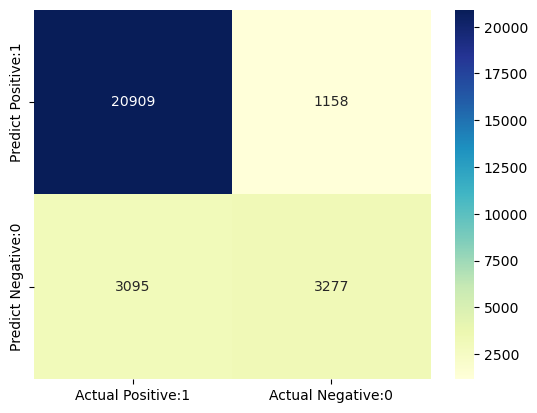

In [ ]:
# 计算混淆矩阵并可视化

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# 打印分类准确率

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8505


## 精确率


**精确率**可以定义为正确预测的积极结果占所有预测的积极结果的百分比。 它可以表示为真阳性 (TP) 与真阳性和假阳性之和 (TP + FP) 的比率。


因此，**精确率**确定了正确预测的积极结果的比例。 它更关心正类而不是负类。



从数学上讲，精确率可以定义为“TP 与 (TP + FP)”的比率。

In [ ]:
# 打印精确率分数

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9475


## 召回率


召回率可以定义为正确预测的积极结果占所有实际积极结果的百分比。
它可以表示为真阳性 (TP) 与真阳性和假阴性之和 (TP + FN) 的比率。 **召回率**也称为**灵敏度**。


**召回率**确定正确预测的实际阳性结果的比例。


从数学上讲，召回率可以表示为“TP 与 (TP + FN)”的比率。
”的比率。

In [ ]:
# 打印召回率

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8711


# 5. 总结

## 思考：

- 为什么要区分数值变量和分类变量？
- 分类变量为什么要将所有类别拆开加在后面，而不是直接赋值的方式？

## 拓展:
- 对于数值变量中的异常值如何处理，进一步提高准确率。（提示：绘制直方图来检查分布，以确定它们是正态分布还是偏态分布。 如果变量遵循正态分布，那么我可以进行极值分析，否则如果它们存在偏差，找到 IQR（分位数范围）。）
- 同学们课后可以自行动手写一下线性回归的模型及训练过程。实现sigmoid函数，CE_loss的计算，反向传播等等。对模型及训练部分进行拓展。
  
- 逻辑回归我们使用的默认值1，这个数值是什么含义，调整他代表什么，课后可以进行尝试。